Convolutional Neural Networks
================

------
**Deep Learning for Computer Vision**

(c) Research Group CAMMA, University of Strasbourg

Website: http://camma.u-strasbg.fr/

-----

Import libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip
import os

In [4]:
import tensorflow as tf

Version should be >= 2.0.

In [5]:
tf.__version__

'2.1.0'

### Load MNIST dataset

In [6]:
path = os.getcwd()
f = gzip.open(path+'/mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='bytes')
f.close()

X_train,y_train = train_set
X_test,y_test = test_set

inds=np.arange(0,X_train.shape[0])
np.random.shuffle(inds)
X_train,y_train = X_train[inds],y_train[inds] 

inds=np.arange(0,X_test.shape[0])
np.random.shuffle(inds)
X_test,y_test = X_test[inds],y_test[inds] 

print(X_train.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)


### Tensorflow model corresponding to a 2-layer neural network

Creating the model using the high-level library Keras:

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu',input_shape=(784,)) )
model.add(tf.keras.layers.Dense(10, activation='softmax') )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


Adding a loss and defining the training parameters:

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 3s 70us/sample - loss: 0.6287 - accuracy: 0.8207
Epoch 2/5
50000/50000 [==============================] - 3s 63us/sample - loss: 0.3421 - accuracy: 0.9003
Epoch 3/5
50000/50000 [==============================] - 3s 66us/sample - loss: 0.3083 - accuracy: 0.9119
Epoch 4/5
50000/50000 [==============================] - 3s 64us/sample - loss: 0.2920 - accuracy: 0.9162
Epoch 5/5
50000/50000 [==============================] - 3s 55us/sample - loss: 0.2816 - accuracy: 0.9191


Evaluating the model on the test set:

In [11]:
model.evaluate(X_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.2743 - accuracy: 0.9221


[0.2743176872253418, 0.9221]

### Use Images as input

In [12]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)


Use of the flattening layer, which linearizes the input, to provide the images directly to the same model:

In [13]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten(input_shape=(28, 28,1)) )
model.add( tf.keras.layers.Dense(64, activation='relu') )
model.add( tf.keras.layers.Dense(10, activation='softmax') )

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model training

In [15]:
history = model.fit(X_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 4s 77us/sample - loss: 0.3261 - accuracy: 0.9085
Epoch 2/5
50000/50000 [==============================] - 3s 60us/sample - loss: 0.1598 - accuracy: 0.9531
Epoch 3/5
50000/50000 [==============================] - 3s 60us/sample - loss: 0.1159 - accuracy: 0.9656
Epoch 4/5
50000/50000 [==============================] - 3s 61us/sample - loss: 0.0905 - accuracy: 0.9727
Epoch 5/5
50000/50000 [==============================] - 3s 61us/sample - loss: 0.0745 - accuracy: 0.9780


Plot of the training accuracy:

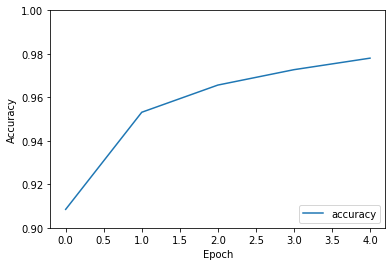

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

In [17]:
model.evaluate(X_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0983 - accuracy: 0.9710


[0.09826992196440697, 0.971]

### Convolutional Neural Network:

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28,28,1) ))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        2336      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                38730     
Total params: 41,146
Trainable params: 41,146
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 16s 328us/sample - loss: 0.1987 - accuracy: 0.9404
Epoch 2/5
50000/50000 [==============================] - 14s 290us/sample - loss: 0.0683 - accuracy: 0.9781
Epoch 3/5
50000/50000 [==============================] - 15s 300us/sample - loss: 0.0483 - accuracy: 0.9849
Epoch 4/5
50000/50000 [==============================] - 13s 258us/sample - loss: 0.0372 - accuracy: 0.9888
Epoch 5/5
50000/50000 [==============================] - 14s 277us/sample - loss: 0.0302 - accuracy: 0.9906


In [22]:
model.evaluate(X_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.0423 - accuracy: 0.9855


[0.0422558992982842, 0.9855]

### Classification on the Cats & Dogs dataset

In [24]:
path = os.getcwd()
f=gzip.open(path+'/td_catsdogs2000_u8.pkl.gz', 'rb')
X_data,y_data = pickle.load(f, encoding='bytes')
f.close()

X_train= X_data[0:1000,:] 
y_train= y_data[0:1000,:]
X_test= X_data[1000:2000,:]
y_test= y_data[1000:2000,:]

In [25]:
print(X_train.shape)
print(X_test.shape)

(1000, 96, 96, 3)
(1000, 96, 96, 3)


Display a few images along with the ground truth:

(-0.5, 95.5, 95.5, -0.5)

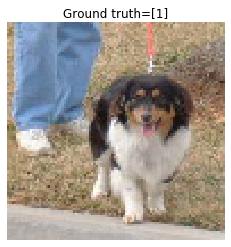

In [26]:
index = 5
im = X_train[index,:]
plt.imshow(im)
plt.title('Ground truth='+str(y_train[index]) )
plt.axis('off')

(-0.5, 95.5, 95.5, -0.5)

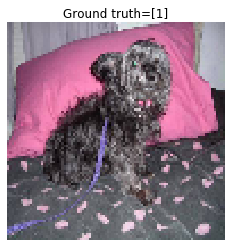

In [27]:
index = 1
im = X_train[index,:]
plt.imshow(im)
plt.title('Ground truth='+str(y_train[index]) )
plt.axis('off')

Definition of the structure of the model: 2-layer neural network classifier with 128 hidden nodes

In [28]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten(input_shape=(96,96,3)) )
model.add( tf.keras.layers.Dense(128, activation='relu') )
model.add( tf.keras.layers.Dense(10, activation='softmax') )

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 1s 1ms/sample - loss: 1041.3360 - accuracy: 0.5090
Epoch 2/5
1000/1000 [==============================] - 1s 814us/sample - loss: 404.0093 - accuracy: 0.5910
Epoch 3/5
1000/1000 [==============================] - 1s 919us/sample - loss: 689.7273 - accuracy: 0.5460
Epoch 4/5
1000/1000 [==============================] - 1s 820us/sample - loss: 462.9958 - accuracy: 0.5850
Epoch 5/5
1000/1000 [==============================] - 1s 854us/sample - loss: 352.2208 - accuracy: 0.6360


In [30]:
model.evaluate(X_test,  y_test, verbose=2)

1000/1000 - 0s - loss: 1046.0917 - accuracy: 0.5030


[1046.0917421875, 0.503]

Definition of a model with 2 convolutional layers separated with a maxpooling layer:

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96,96,3) ))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [32]:
#TODO<
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
#TODO>

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 7s 7ms/sample - loss: 152.0291 - accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 7s 7ms/sample - loss: 0.5939 - accuracy: 0.6600
Epoch 3/5
1000/1000 [==============================] - 7s 7ms/sample - loss: 0.4048 - accuracy: 0.7880
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/sample - loss: 0.2660 - accuracy: 0.8890
Epoch 5/5
1000/1000 [==============================] - 6s 6ms/sample - loss: 0.1584 - accuracy: 0.9320


In [33]:
model.evaluate(X_test,  y_test, verbose=2)

1000/1000 - 2s - loss: 1.3220 - accuracy: 0.5730


[1.3220111055374146, 0.573]